**Aim**: Create a visualisation of Covid cases for Oxford

## Excercise 1

<u>Task</u>: Format the text in the cell below using the picture reference to enhance its readability:

The Public Heath England reports:

> The latest $R$ number is estimated at **0.9 to 1** with a daily infection growth rate range of **-2% to 0%** as of 27 November 2020.
> Source: [coronavirus.data.gov.uk](https://coronavirus.data.gov.uk/)

Reference:
![](media/ex-1-reference.png)

In [1]:
from pandas import read_csv
from datetime import datetime

In [2]:
coronavirus_cases = read_csv(
    'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv',
    parse_dates=['Specimen date'],
    date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d')
)

## Exercise 2

<u>Task</u>: Add a code cell below displaying the first five rows of the `coronavirus_cases` data frame (function `head()` in R, method `.head()` in Python).

In [3]:
coronavirus_cases.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,Adur,E07000223,ltla,2020-11-30,0,572,889.6
1,Adur,E07000223,ltla,2020-11-29,0,572,889.6
2,Adur,E07000223,ltla,2020-11-28,1,572,889.6
3,Adur,E07000223,ltla,2020-11-27,6,571,888.0
4,Adur,E07000223,ltla,2020-11-26,1,565,878.7


## Exercise 3

<u>Task</u>: To increase our belief that dates are correctly parsed, verify that no cases were reported before the beginning of the outbreak (2019-12-01) using assert in Python it stop in R. Example checking that no cases were recorded in the future:

In [4]:
assert coronavirus_cases['Specimen date'].max() < datetime.now()

To create a date in Python use:

In [5]:
datetime
# use ? to get information on arguments accepted by datetime

datetime.datetime

Your solution:

## Exercise 4

<u>Task</u>: The code below has a stylistic issue (departs from the style guidelines for Python) which makes the code potentially more difficult to understand. These issues can be easily spotted when using a linter. Identify and fix the issue:

In [6]:
coronavirus_cases ['Cumulative lab-confirmed cases'].max()

1413410

Your solution:

## Exercise 5

<u>Task</u>: Increase the size of the image below:

In [10]:
from plotnine import ggplot, geom_point, aes, options

In [11]:
is_oxford = coronavirus_cases['Area name'] == 'Oxford'
oxford_cases = coronavirus_cases[is_oxford]
other_cases = coronavirus_cases[~is_oxford]

Hint: see the [documentation of options](https://plotnine.readthedocs.io/en/stable/_modules/plotnine/options.html).

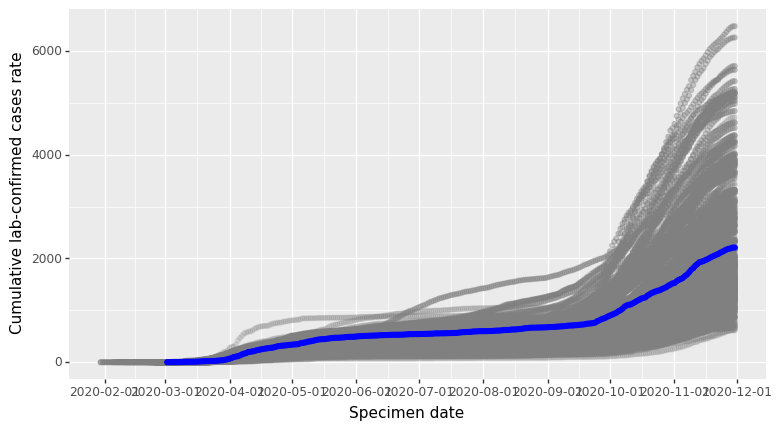

<ggplot: (8771202901890)>

In [12]:
options.figure_size = (900 / options.dpi, 480 / options.dpi)
(
    ggplot(other_cases, aes(x='Specimen date', y='Cumulative lab-confirmed cases rate'))
    + geom_point(color='grey', alpha=0.2)
    + geom_point(data=oxford_cases, color='blue')
)

## Exercise 6

<u>Task</u>: Compare your result against the `Solution.ipynb` notebook using nbdiff tools